In [45]:
import pandas as pd  
import numpy as np
import os
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore


In [19]:
%matplotlib inline 

Variable Name	Description
Carat	 Carat weight of the cubic zirconia.
Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color 	 Colour of the cubic zirconia.With D being the worst and J the best.
Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, IF = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
Depth	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price	 the Price of the cubic zirconia.
X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.

In [20]:
cub = pd.read_csv("cubic_zirconia.csv")
cub.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [21]:
cub = cub.drop("Unnamed: 0", axis = 1)
cub.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [22]:
cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


# EDA

In [23]:
cub.describe(include = "all")

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [24]:
cub.shape

(26967, 10)

In [25]:
dups = cub.duplicated()
dups.sum()

34

In [26]:
cub = cub.drop_duplicates()

In [27]:
cub.shape

(26933, 10)

In [28]:
cub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


# Univariate

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\si

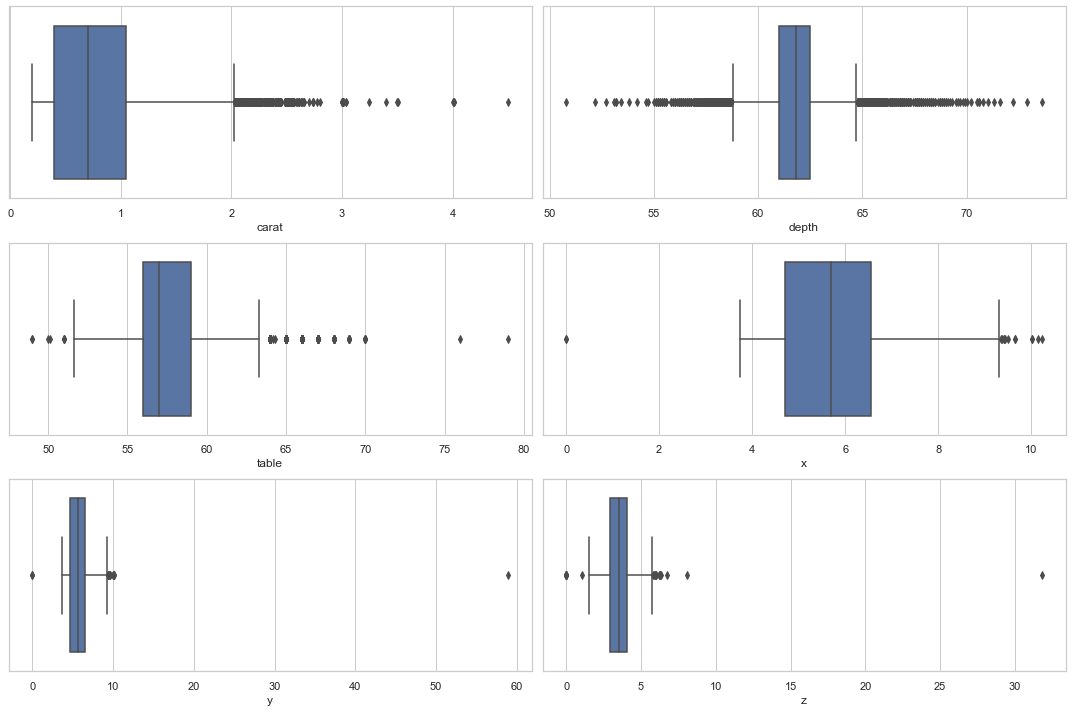

In [29]:
data_plot = cub.select_dtypes(include = ["int","float"])
fig = plt.figure(figsize = (15, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(3,2, i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()


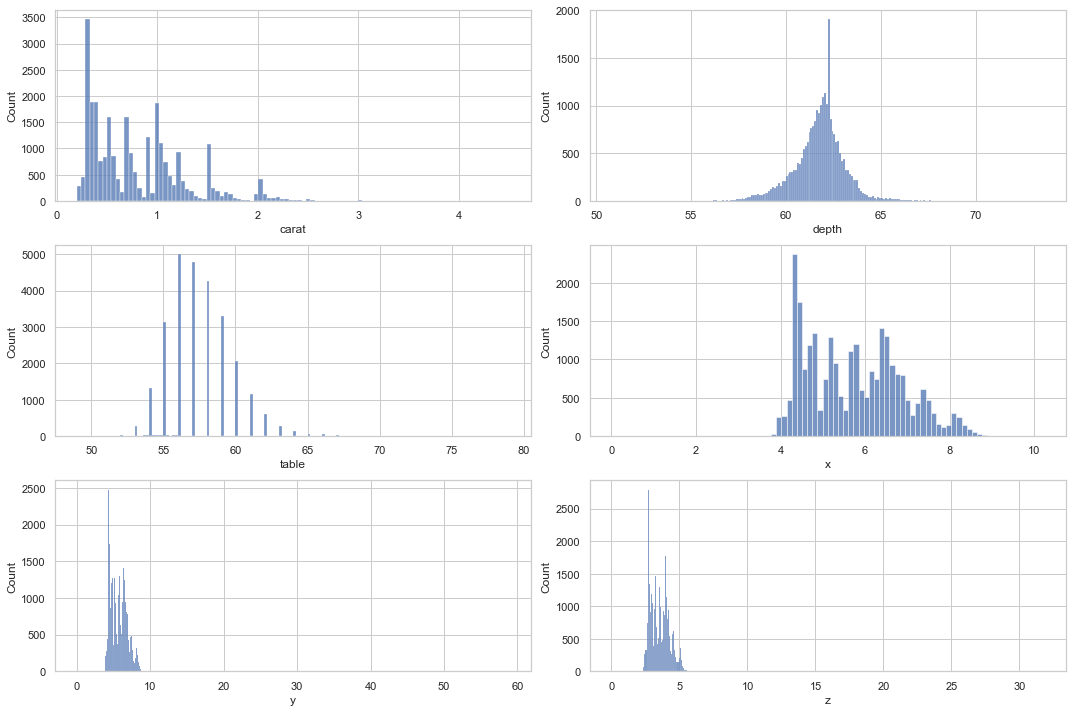

In [30]:
data_plot = cub.select_dtypes(include = ["int","float"])
fig = plt.figure(figsize = (15, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(3,2, i+1)
    sns.histplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()


# Multi-Variate

<Figure size 1080x1080 with 0 Axes>

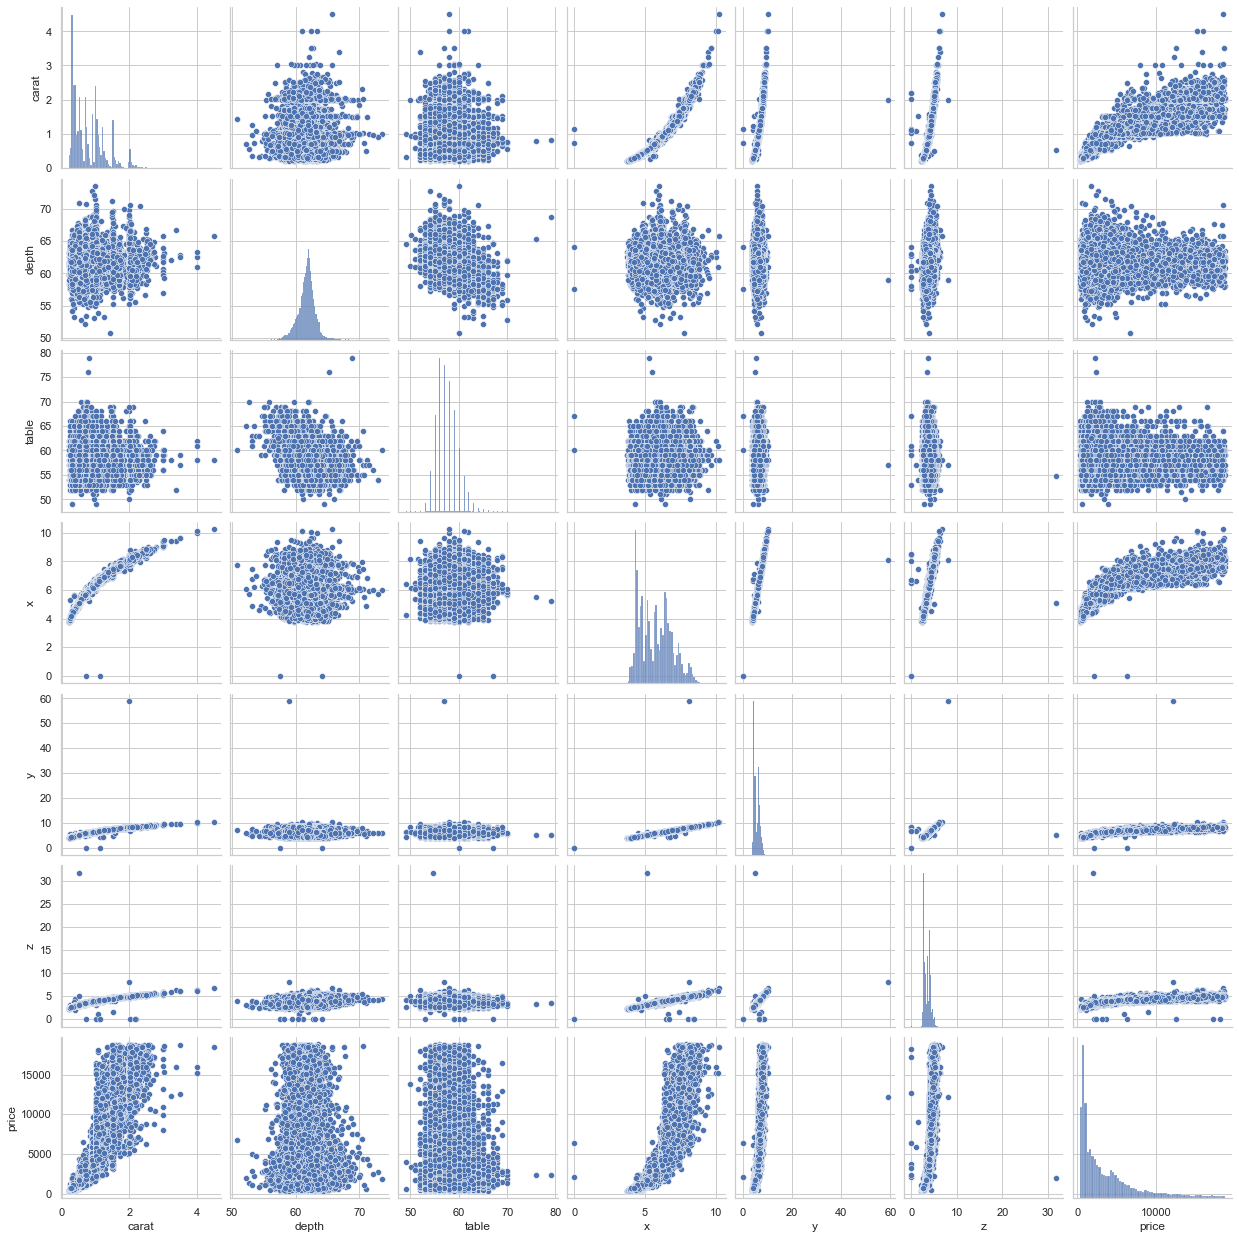

<Figure size 1080x1080 with 0 Axes>

In [31]:
sns.pairplot(cub)
plt.figure(figsize = (15, 15))

<AxesSubplot:>

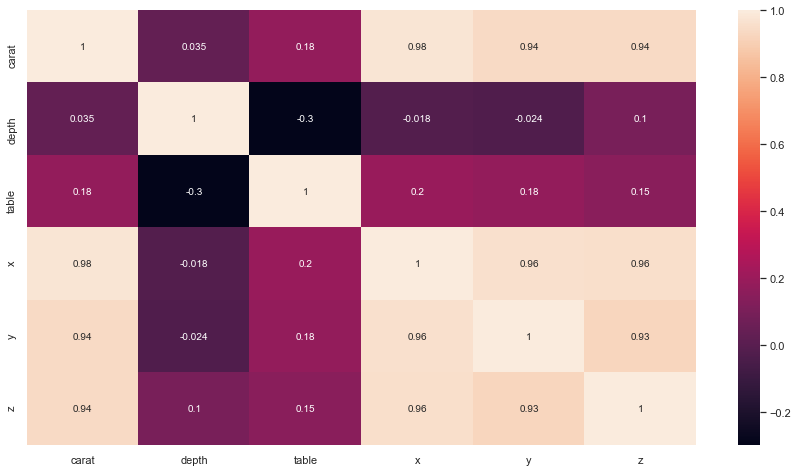

In [32]:
cub1 = cub.drop("price", axis = 1)
plt.figure(figsize = (15,8))
sns.heatmap(cub1.corr(), annot = True)

# Checking for Null Values

In [33]:
cub.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

# Imputing Null values

In [34]:
cub.depth.describe()

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

In [35]:
cub.depth.median()

61.8

In [36]:
cub["depth"]= cub["depth"].fillna(cub["depth"].median())

In [37]:
cub.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

# Checking for zero values

In [38]:
cub.select_dtypes(include = "object").head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [39]:
cub.select_dtypes(include = ["int","float"]).head()

,carat,depth,table,x,y,z
0,0.30,62.1,58.0,4.27,4.29,2.66
1,0.33,60.8,58.0,4.42,4.46,2.70
2,0.90,62.2,60.0,6.04,6.12,3.78
3,0.42,61.6,56.0,4.82,4.80,2.96
4,0.31,60.4,59.0,4.35,4.43,2.65


In [40]:
num = cub.select_dtypes(include = ["int","float"])
num.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [41]:
cub[cub["carat"] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [42]:
cub[cub["depth"] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [43]:
cub[cub["table"] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [44]:
cub[cub["x"]==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [45]:
cub[cub["y"]==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [46]:
cub[cub["z"]==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [47]:
cub.loc[5821]

carat      0.71
cut        Good
color         F
clarity     SI2
depth      64.1
table        60
x             0
y             0
z             0
price      2130
Name: 5821, dtype: object

There are two rows that have zeros in features x, y
There are 8 rows that have zeros in z
We can drop the two rows that have zeros in x and y because it is erronous. There cannot be a stone with no length and breadth
We keep the remaining six rows that have zero in the z feature as it's possible to have a flat stone.

# Dropping Rows that have zeros in all x, y and z features:

In [48]:
df = cub.drop([5821,17506])

In [49]:
df.shape

(26931, 10)

In [50]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26931 non-null  float64
 1   cut      26931 non-null  object 
 2   color    26931 non-null  object 
 3   clarity  26931 non-null  object 
 4   depth    26931 non-null  float64
 5   table    26931 non-null  float64
 6   x        26931 non-null  float64
 7   y        26931 non-null  float64
 8   z        26931 non-null  float64
 9   price    26931 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


# Treating Outliers

In [52]:
Q1 = cub.quantile(0.25)
Q3 = cub.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

In [53]:
print("Lower Range Values:\n", lower_range,"\n")
print("Upper Range Values:\n", upper_range,"\n")

Lower Range Values:
 carat      -0.575
depth      59.000
table      51.500
x           1.950
y           1.965
z           1.190
price   -5671.500
dtype: float64 

Upper Range Values:
 carat        2.025
depth       64.600
table       63.500
x            9.310
y            9.285
z            5.750
price    11972.500
dtype: float64 



In [54]:
cub["x"].sort_values(ascending = False).head(50)

12500    10.23
20505    10.14
3025     10.02
8156     10.01
15080     9.66
8573      9.65
19761     9.51
26869     9.44
12758     9.42
17076     9.42
16538     9.38
15488     9.36
9637      9.30
7878      9.25
2907      9.24
669       9.14
13052     9.10
16872     9.06
124       9.03
8205      8.99
1072      8.99
20551     8.99
3194      8.93
5582      8.90
19847     8.88
14677     8.88
1350      8.88
4135      8.87
19013     8.87
12810     8.85
951       8.85
26284     8.84
16425     8.84
20628     8.83
25570     8.83
22799     8.82
3390      8.82
17348     8.81
26235     8.80
16892     8.80
7033      8.78
9151      8.78
16206     8.77
11149     8.76
5402      8.76
25733     8.76
8425      8.75
21359     8.75
25455     8.75
20621     8.74
Name: x, dtype: float64

In [55]:
cub["carat"] = np.where(cub["carat"]>2.025,2.025,cub["carat"])

cub["depth"] = np.where(cub["depth"]>64.6,64.6,cub["depth"])
cub["depth"] = np.where(cub["depth"]<59.0,59.0,cub["depth"])

cub["table"] = np.where(cub["table"]>63.5,63.5,cub["table"])
cub["table"] = np.where(cub["table"]<51.5,51.5,cub["table"])

cub["x"] = np.where(cub["x"]>9.3,9.3,cub["x"])
cub["x"] = np.where(cub["x"]<3.73,3.73,cub["x"])

cub["y"] = np.where(cub["y"]>9.285,9.285,cub["y"])
cub["y"] = np.where(cub["y"]<1.965,1.965,cub["y"])

cub["z"] = np.where(cub["z"]>5.750,5.750,cub["z"])
cub["z"] = np.where(cub["z"]<1.190,1.190,cub["z"])


C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\si

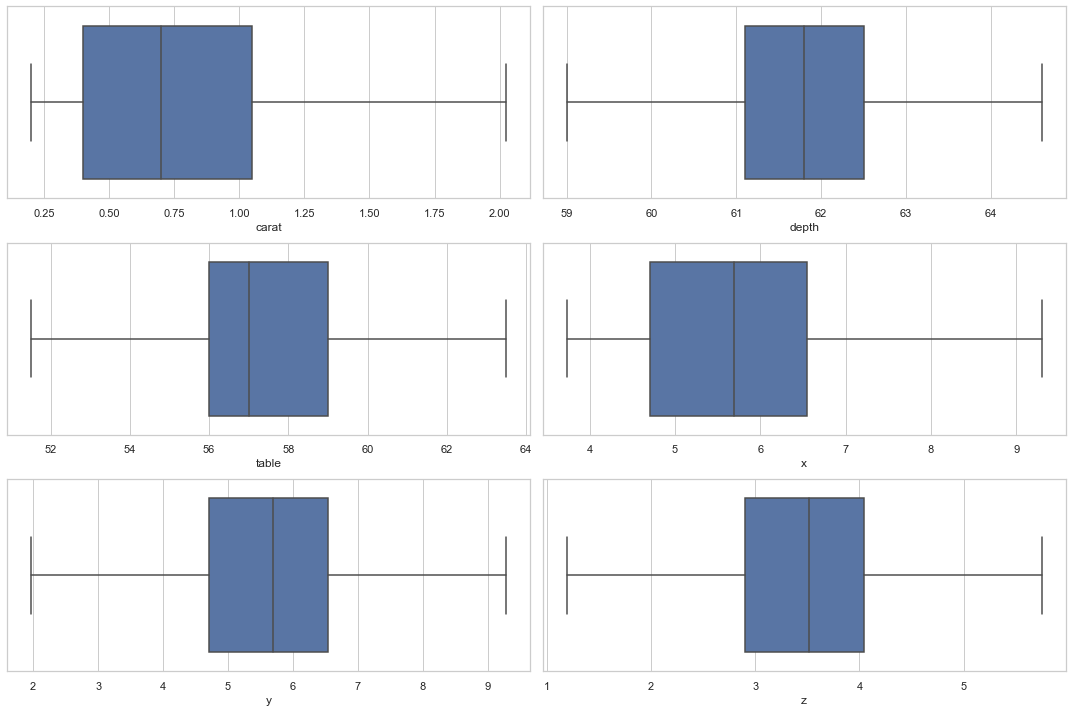

In [56]:
data_plot = cub.select_dtypes(include = ["int","float"])
fig = plt.figure(figsize = (15, 10))
for i in range(0, len(data_plot.columns)):
    ax = fig.add_subplot(3,2, i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

# Data Encoding

In [57]:
df_cat = df.select_dtypes(include = "object")
df_cat.head()

,cut,color,clarity
0,Ideal,E,SI1
1,Premium,G,IF
2,Very Good,E,VVS2
3,Ideal,F,VS1
4,Ideal,F,VVS1


In [58]:
df["cut"].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [59]:
df["cut"] = df["cut"].replace({"Ideal" : 5, "Premium": 4, "Very Good": 3, "Good": 2,"Fair": 1})

In [60]:
df["cut"].value_counts()

5    10805
4     6886
3     6027
2     2434
1      779
Name: cut, dtype: int64

In [61]:
df["color"].value_counts()

G    5652
E    4916
F    4722
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

 Colour of the cubic zirconia.With D being the worst and J the best.

In [62]:
df["color"] = df["color"].replace({"G" : 4, "E": 6, "F": 5, "H": 3,"D": 7, "I": 2, "J": 1})

In [63]:
df["color"].value_counts()

4    5652
6    4916
5    4722
3    4095
7    3341
2    2765
1    1440
Name: color, dtype: int64

In [64]:
df["clarity"].value_counts()

SI1     6565
VS2     6093
SI2     4563
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [65]:
df["clarity"] = df["clarity"].replace({"SI1" : 6, "VS2": 5, "SI2": 7, "VS1": 4,"VVS2": 3, "VVS1": 2, "IF": 1, "I1": 8})

cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, IF = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

In [66]:
df["clarity"].value_counts()

6    6565
5    6093
7    4563
4    4086
3    2530
2    1839
1     891
8     364
Name: clarity, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26931 non-null  float64
 1   cut      26931 non-null  int64  
 2   color    26931 non-null  int64  
 3   clarity  26931 non-null  int64  
 4   depth    26931 non-null  float64
 5   table    26931 non-null  float64
 6   x        26931 non-null  float64
 7   y        26931 non-null  float64
 8   z        26931 non-null  float64
 9   price    26931 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.3 MB


In [68]:
df.shape

(26931, 10)

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26931.0,0.798001,0.477250,0.20,0.400,0.70,1.05,4.50
cut,26931.0,3.909881,1.113004,1.00,3.000,4.00,5.00,5.00
color,26931.0,4.394787,1.705941,1.00,3.000,4.00,6.00,7.00
clarity,26931.0,4.946381,1.646752,1.00,4.000,5.00,6.00,8.00
depth,26931.0,61.746771,1.393613,50.80,61.100,61.80,62.50,73.60
table,26931.0,57.455501,2.231428,49.00,56.000,57.00,59.00,79.00
x,26931.0,5.729772,1.126327,3.73,4.710,5.69,6.55,10.23
y,26931.0,5.733528,1.164032,3.71,4.715,5.70,6.54,58.90
z,26931.0,3.538032,0.719345,0.00,2.900,3.52,4.04,31.80
price,26931.0,3937.502506,4022.658593,326.00,945.000,2375.00,5355.50,18818.00


In [70]:
scaled_df = df.apply(zscore)

In [71]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26931.0,-1.737746e-16,1.000019,-1.253037,-0.833962,-0.205349,0.528033,7.757083
cut,26931.0,-3.840516e-16,1.000019,-2.614488,-0.817515,0.080971,0.979457,0.979457
color,26931.0,4.899146e-17,1.000019,-1.990016,-0.817621,-0.231423,0.940972,1.527170
clarity,26931.0,-7.934935e-17,1.000019,-2.396508,-0.574706,0.032561,0.639828,1.854362
depth,26931.0,4.293761e-17,1.000019,-7.855103,-0.464105,0.038195,0.540496,8.505552
table,26931.0,-1.466459e-15,1.000019,-3.789349,-0.652286,-0.204134,0.692170,9.655208
x,26931.0,-7.238154e-16,1.000019,-1.775514,-0.905413,-0.035312,0.728247,3.995566
y,26931.0,1.067259e-15,1.000019,-1.738410,-0.875016,-0.028803,0.692839,45.675243
z,26931.0,-4.828157e-16,1.000019,-4.918500,-0.886979,-0.025068,0.697826,39.289210
price,26931.0,2.443802e-17,1.000019,-0.897807,-0.743925,-0.388433,0.352509,3.699239


# Splitting The Data

In [62]:
X = scaled_df.drop("price", axis = 1)
y = scaled_df["price"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)


In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18851, 9)
(8080, 9)
(18851,)
(8080,)


In [64]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [65]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 1.3011713324761172
The coefficient for cut is 0.028941283908335197
The coefficient for color is 0.13777468414777763
The coefficient for clarity is -0.20548487734098891
The coefficient for depth is -0.029211018254051854
The coefficient for table is -0.017177026379226235
The coefficient for x is -0.2655407443461595
The coefficient for y is 0.002987223092219104
The coefficient for z is -0.0016407612350765332


In [66]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.7466784550212392e-05


In [92]:
scores_train = regression_model.score(X_train, y_train)

In [93]:
scores_test = regression_model.score(X_test, y_test)

In [72]:
ytrain_pred = regression_model.predict(X_train)

In [81]:
y_pred = regression_model.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [87]:
rmse_train = np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train)))
rmse_test = np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))


In [90]:
print(rmse_train)
print(rmse_test)

0.3030022363800388
0.30125465579758065


In [94]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression']))

                   Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression    0.303002   0.301255        0.907797    0.910135


In [82]:
# So the model explains 91% of the variability in Y using X

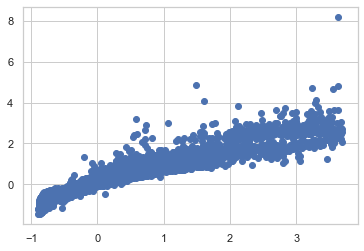

<Figure size 7200x7200 with 0 Axes>

In [83]:
plt.scatter(y_test, y_pred)
plt.figure(figsize = (100, 100))
plt.show()

In [95]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2275,-1.043499,0.979457,0.940972,0.032561,-0.392348,-1.100437,-1.225042,-1.222951,-1.234524,-0.769034
12311,0.905201,0.979457,-0.231423,-0.574706,-0.105319,-0.204134,0.985726,1.002115,0.961960,1.720660
5030,0.632802,-1.716001,0.940972,1.247095,1.114554,-0.652286,0.710489,0.727203,0.850745,0.031695
8481,1.470953,0.080971,-1.403818,0.032561,-0.464105,1.140322,1.420776,1.397300,1.323406,1.375608
25220,2.581502,-0.817515,-1.403818,1.247095,0.755768,1.140322,2.006763,1.990078,2.088005,2.268566


In [96]:
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    0.000017
carat        1.301171
cut          0.028941
color        0.137775
clarity     -0.205485
depth       -0.029211
table       -0.017177
x           -0.265541
y            0.002987
z           -0.001641
dtype: float64

In [97]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.061e+04
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:52:51   Log-Likelihood:                -4240.0
No. Observations:               18851   AIC:                             8500.
Df Residuals:                   18841   BIC:                             8579.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.747e-05      0.002      0.008      0.9

In [64]:
#carat, cut,color,clarity,depth,table and length of the stone are good predictors of price.
#width and height of the stone are bad predictors of price. 
#p value < 0.05 rejects null hypothesis. hence this model, minus the useless features, is good for predicting future price of the stone 



In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 


In [99]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 24.9792832820242
cut ---> 1.4939070171396887
color ---> 1.1208192931535599
clarity ---> 1.2304345213907233
depth ---> 1.572847193224135
table ---> 1.5938807880178072
x ---> 46.85866904936365
y ---> 13.84084424311968
z ---> 14.107227076730016


# Problem 2

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Holiday_Package 	 Opted for Holiday Package yes/no?
Salary 	 Employee salary
age 	 Age in years
edu 	 Years of formal education
no_young_children 	 The number of young children (younger than 7 years)
no_older_children 	 Number of older children
foreign 	 foreigner Yes/No

In [2]:
holiday = pd.read_csv("Holiday_Package.csv").drop("Unnamed: 0", axis = 1)
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [3]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [4]:
holiday.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [5]:
holiday.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [6]:
holiday.duplicated().sum()

0

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

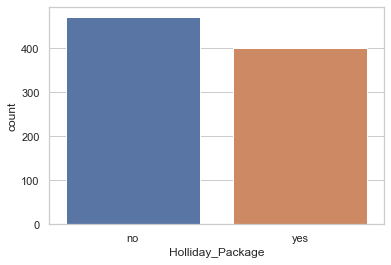

In [7]:
sns.countplot(holiday["Holliday_Package"])

In [8]:
holiday["Holliday_Package"].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [9]:
holiday["Holliday_Package"].value_counts(normalize = True)*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='foreign', ylabel='count'>

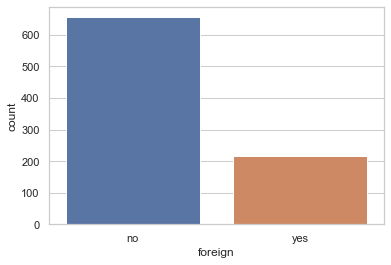

In [10]:
sns.countplot(holiday["foreign"])

In [11]:
holiday["foreign"].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [12]:
holiday["foreign"].value_counts(normalize = True)*100

no     75.229358
yes    24.770642
Name: foreign, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Holliday_Package'>

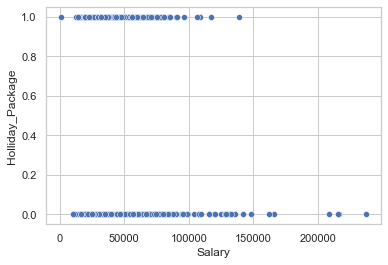

In [92]:
sns.scatterplot(x = "Salary", y = "Holliday_Package", palette = 'dark', data = holiday, ci = None)


In [13]:
holiday["no_young_children"].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [14]:
holiday["no_older_children"].value_counts()

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

In [15]:
holiday["educ"].value_counts()

8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64

# EDA

In [16]:
num = holiday.select_dtypes(include = "int64")

In [17]:
num

,Salary,age,educ,no_young_children,no_older_children
0,48412,30,8,1,1
1,37207,45,8,0,1
2,58022,46,9,0,0
3,66503,31,11,2,0
4,66734,44,12,0,2
...,...,...,...,...,...
867,40030,24,4,2,1
868,32137,48,8,0,0
869,25178,24,6,2,0
870,55958,41,10,0,1


In [18]:
def univariateAnalysis_numeric(column,nbins):
    
    plt.figure()
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    print("UVA of " + column.upper())
    sns.histplot(num[column], kde=False, color='g', ax=axs[0])
    sns.boxplot(x=num[column], ax=axs[1])
    plt.show()

UVA of SALARY


<Figure size 432x288 with 0 Axes>

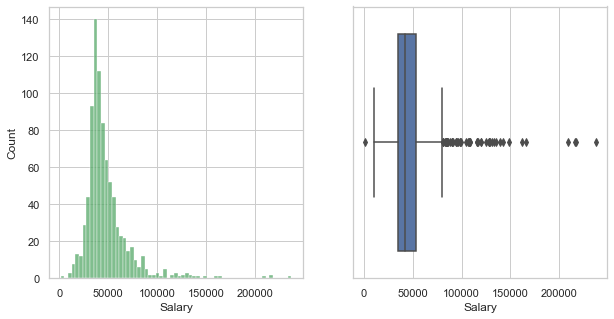

UVA of AGE


<Figure size 432x288 with 0 Axes>

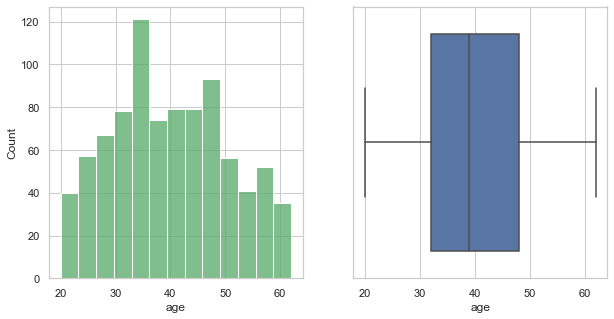

UVA of EDUC


<Figure size 432x288 with 0 Axes>

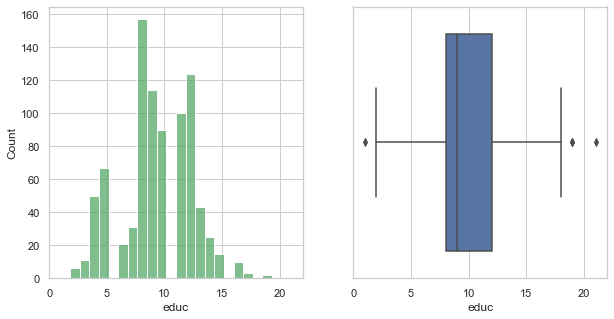

UVA of NO_YOUNG_CHILDREN


<Figure size 432x288 with 0 Axes>

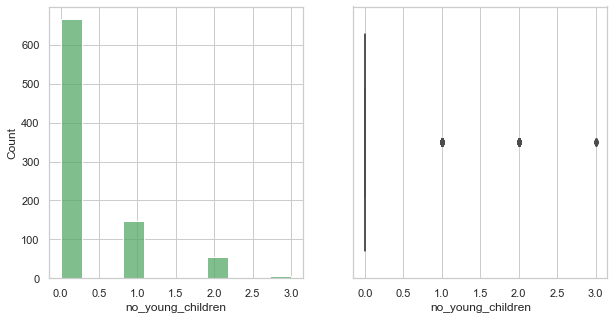

UVA of NO_OLDER_CHILDREN


<Figure size 432x288 with 0 Axes>

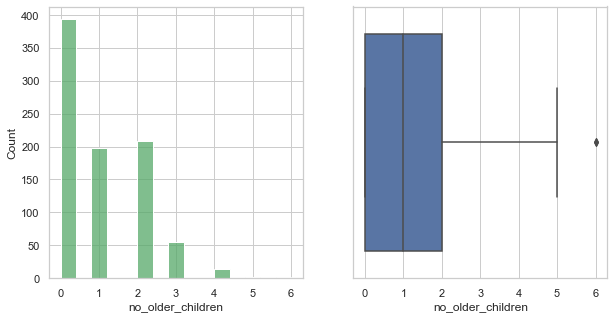

In [19]:
for x in list(num.columns.values):
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

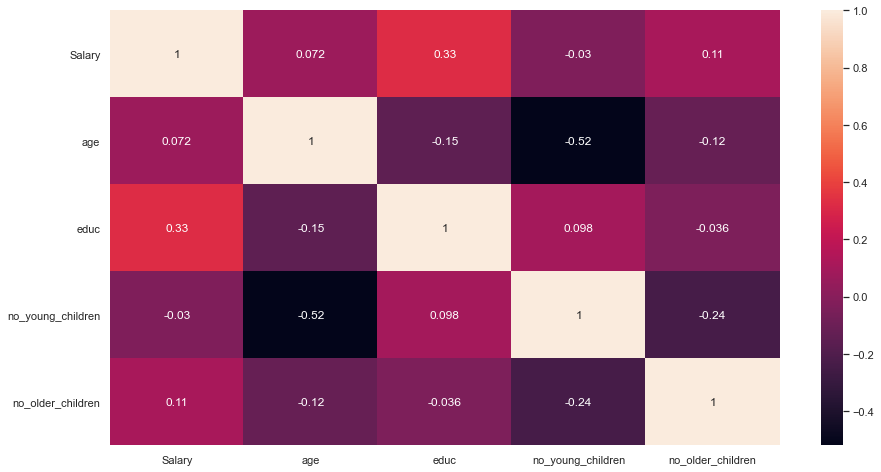

In [20]:
corr = holiday.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot = True)

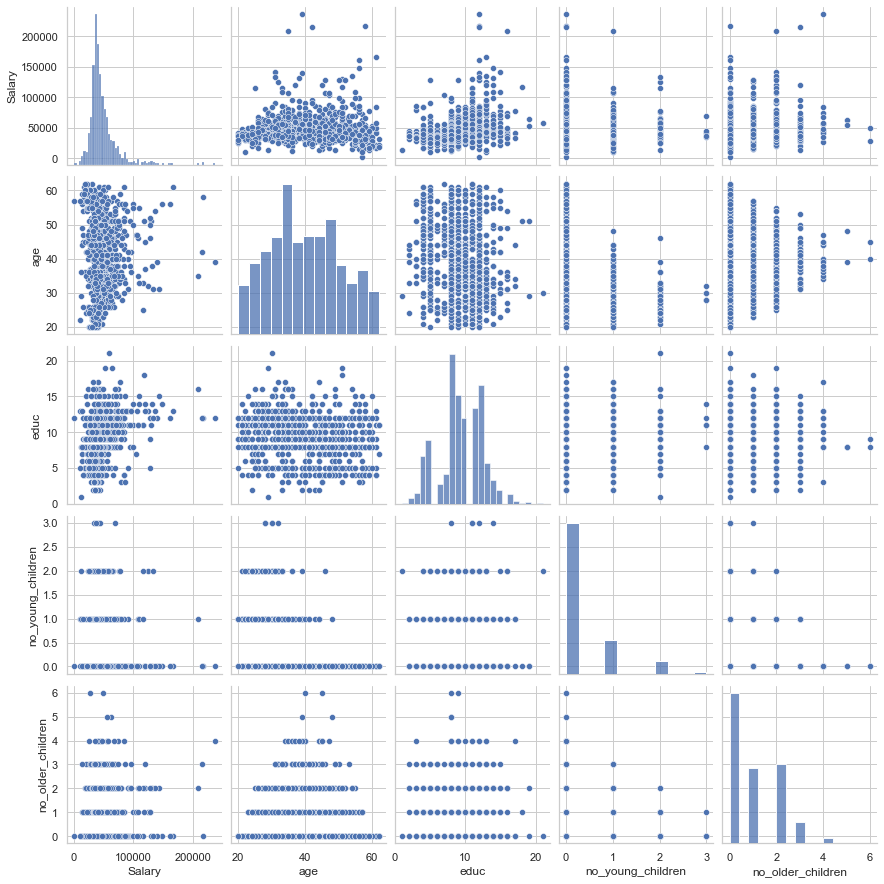

In [21]:
sns.pairplot(holiday)

# Treating Outliers:

In [22]:
Q1 = holiday.quantile(0.25)
Q3 = holiday.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1 - (1.5 * IQR)
upper_range = Q3 + (1.5 * IQR)

In [23]:
print("Lower Range Values:\n", lower_range,"\n")
print("Upper Range Values:\n", upper_range,"\n")

Lower Range Values:
 Salary               8105.75
age                     8.00
educ                    2.00
no_young_children       0.00
no_older_children      -3.00
dtype: float64 

Upper Range Values:
 Salary               80687.75
age                     72.00
educ                    18.00
no_young_children        0.00
no_older_children        5.00
dtype: float64 



In [39]:
holiday["Salary"] = np.where(holiday["Salary"]>80687.75,80687.75,holiday["Salary"])
holiday["Salary"] = np.where(holiday["Salary"]<8105.75,8105.75,holiday["Salary"])


holiday["educ"] = np.where(holiday["educ"]>18.00,18.00,holiday["educ"])
holiday["educ"] = np.where(holiday["educ"]<2.00,2.00,holiday["educ"])

holiday["no_young_children"] = np.where(holiday["no_young_children"]>0,0,holiday["no_young_children"])

holiday["no_older_children"] = np.where(holiday["no_older_children"]>1,1,holiday["no_older_children"])


In [40]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    int64  
 5   no_older_children  872 non-null    int64  
 6   foreign            872 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 47.8+ KB


In [41]:
num = holiday.select_dtypes(include = ["int64","float64"])
num

,Salary,age,educ,no_young_children,no_older_children
0,48412.0,30,8.0,0,1
1,37207.0,45,8.0,0,1
2,58022.0,46,9.0,0,0
3,66503.0,31,11.0,0,0
4,66734.0,44,12.0,0,1
...,...,...,...,...,...
867,40030.0,24,4.0,0,1
868,32137.0,48,8.0,0,0
869,25178.0,24,6.0,0,0
870,55958.0,41,10.0,0,1


C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Vinay\anaconda3\lib\si

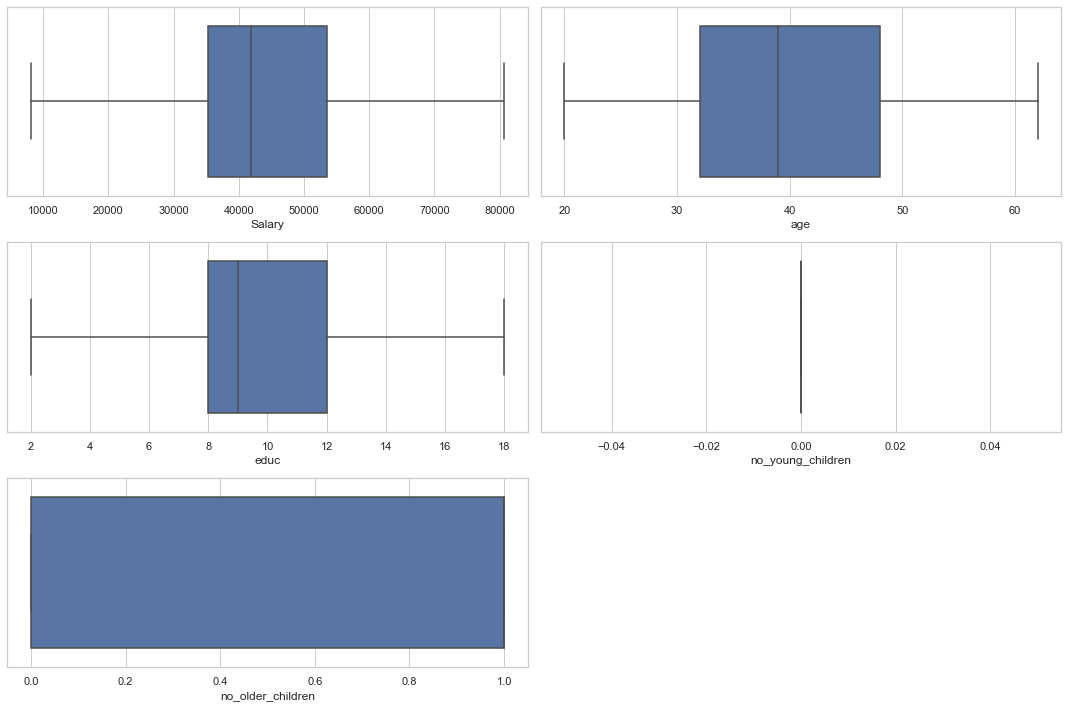

In [42]:
fig = plt.figure(figsize = (15, 10))
for i in range(0, len(num.columns)):
    ax = fig.add_subplot(3,2, i+1)
    sns.boxplot(num[num.columns[i]])
    plt.tight_layout()

# Encoding: 

In [22]:
for column in holiday.columns:
    if holiday[column].dtype == 'object':
        holiday[column] = pd.Categorical(holiday[column]).codes 

In [23]:
holiday.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


# Data Split

In [25]:
a = holiday.drop(["Holliday_Package"], axis = 1)
B = holiday["Holliday_Package"]

a_train, a_test, B_train, B_test = train_test_split(a, B, test_size=0.30 , random_state=1)

# Logistic Regression

In [74]:
lr = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
LogR= lr.fit(a_train, B_train)
LogR

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   11.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [75]:
#predicting on train set

In [76]:
pred_train = LogR.predict(a_train)

In [77]:
confusion_matrix(B_train, pred_train)

array([[252,  74],
       [122, 162]], dtype=int64)

In [78]:
print(classification_report(B_train, pred_train))


              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.69      0.57      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [79]:
#predict on test set

In [80]:
pred_class = LogR.predict(a_test)

In [81]:
confusion_matrix(B_test, pred_class)

array([[102,  43],
       [ 52,  65]], dtype=int64)

In [82]:
print(classification_report(B_test, pred_class))


              precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



# LDA

In [35]:
clf = LinearDiscriminantAnalysis()
lda =clf.fit(a_train,B_train)
lda

LinearDiscriminantAnalysis()

In [36]:
pred_train = lda.predict(a_train)

In [37]:
confusion_matrix(B_train, pred_train)

array([[252,  74],
       [126, 158]], dtype=int64)

In [38]:
print(classification_report(B_train, pred_train))


              precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.61       284

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



In [39]:
pred_class = lda.predict(a_test)

In [40]:
print(classification_report(B_test, pred_class))


              precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



In [123]:
confusion_matrix(B_test, pred_class)

array([[103,  42],
       [ 52,  65]], dtype=int64)

# Model Comparison

In [41]:
models=[LogR,lda]
models_names={LogR:'Logistic Regression',lda:'LDA'}

Area under the curve for Logistic Regression Model is 0.7046861184792218
Area under the curve for LDA Model is 0.7029177718832891


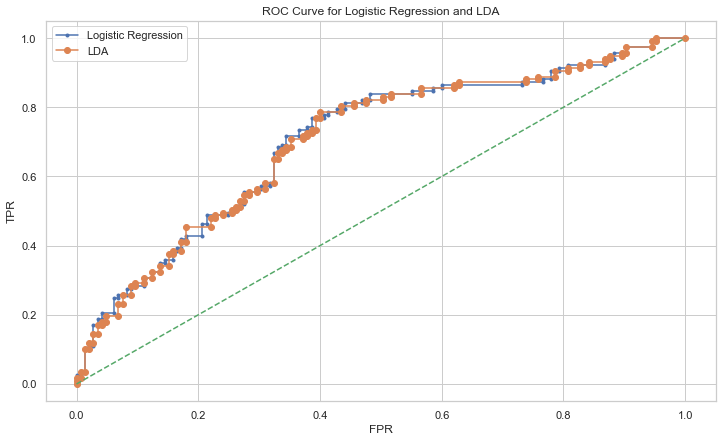

In [43]:
print('Area under the curve for Logistic Regression Model is',roc_auc_score(B_test,LogR.predict_proba(a_test)[:,1]))
print('Area under the curve for LDA Model is',roc_auc_score(B_test,lda.predict_proba(a_test)[:,1]))


plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(B_test, LogR.predict_proba(a_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(B_test, lda.predict_proba(a_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('Logistic Regression and LDA'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy for Logistic Regression model is 
 0.6374045801526718


Classification report for Logistic Regression model is 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



Confusion Matrix for Logistic Regression model is


[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.2s finished


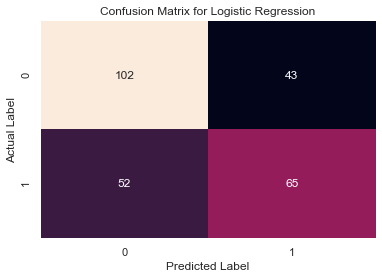

Accuracy for LDA model is 
 0.6412213740458015


Classification report for LDA model is 
               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262



Confusion Matrix for LDA model is


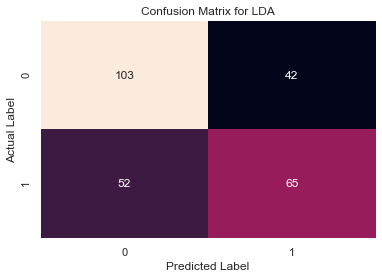

In [47]:
for i in models:
    i.fit(a_train,B_train)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(B_test,i.predict(a_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(B_test,i.predict(a_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(B_test,i.predict(a_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()